In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
mushroom_data=pd.read_csv("mushrooms.csv")#Read the whole data
Mushroom_DataBayes=mushroom_data
mushroom_data.head()#display first 5 instances



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
##########Data Shuffling##########
from sklearn.utils import shuffle
#mushroom_data=shuffle(mushroom_data)

In [4]:
#######Finding sum of null values if any########
print(mushroom_data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [5]:
col=mushroom_data.columns
for i in (col):
    print(i," is ", pd.unique(mushroom_data[i]))

class  is  ['p' 'e']
cap-shape  is  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  is  ['s' 'y' 'f' 'g']
cap-color  is  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  is  ['t' 'f']
odor  is  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  is  ['f' 'a']
gill-spacing  is  ['c' 'w']
gill-size  is  ['n' 'b']
gill-color  is  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  is  ['e' 't']
stalk-root  is  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  is  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  is  ['s' 'f' 'y' 'k']
stalk-color-above-ring  is  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  is  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  is  ['p']
veil-color  is  ['w' 'n' 'o' 'y']
ring-number  is  ['o' 't' 'n']
ring-type  is  ['p' 'e' 'l' 'f' 'n']
spore-print-color  is  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  is  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  is  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


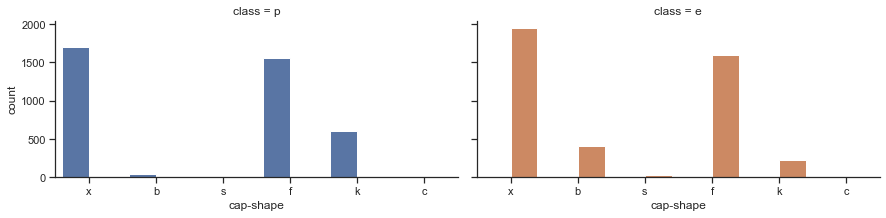

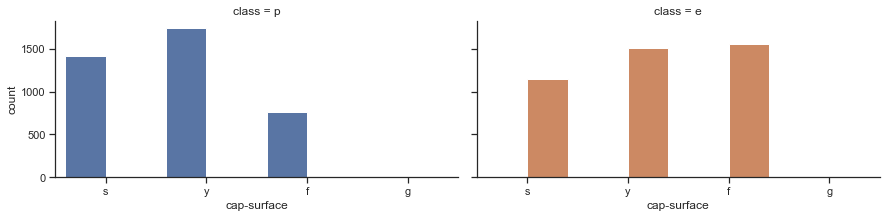

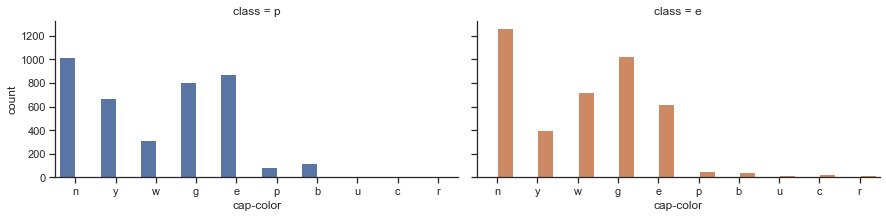

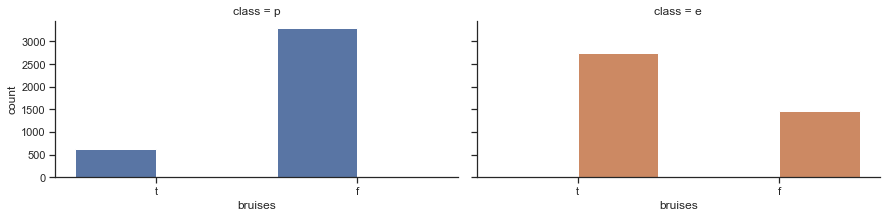

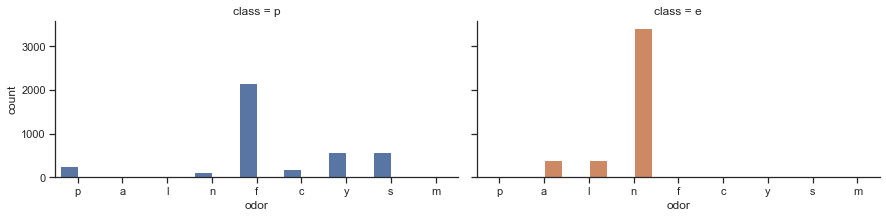

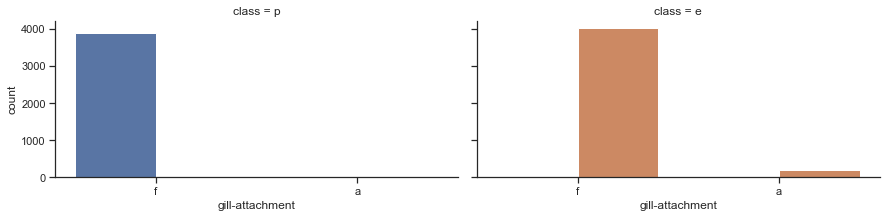

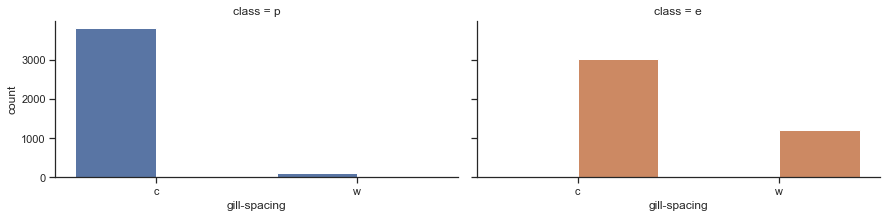

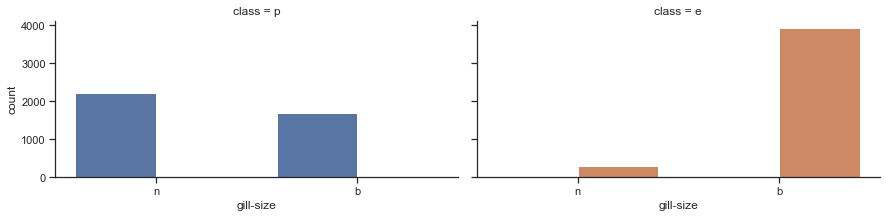

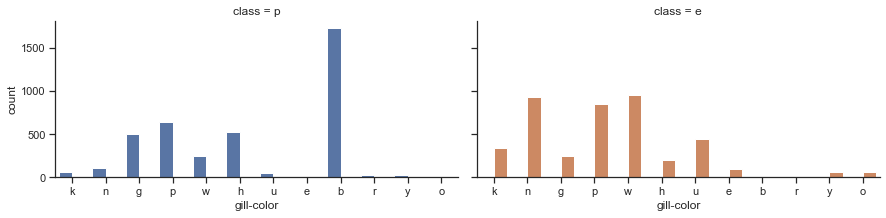

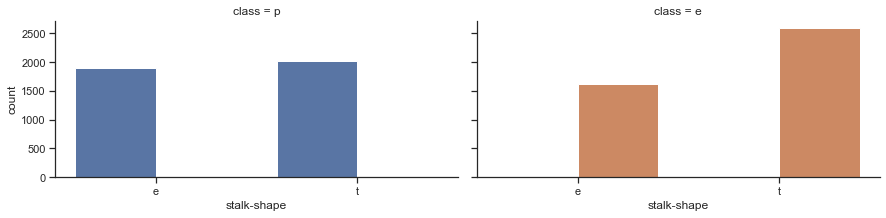

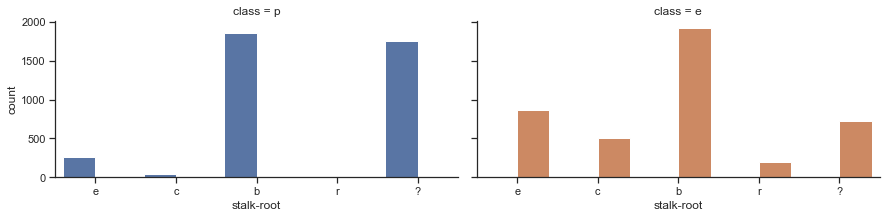

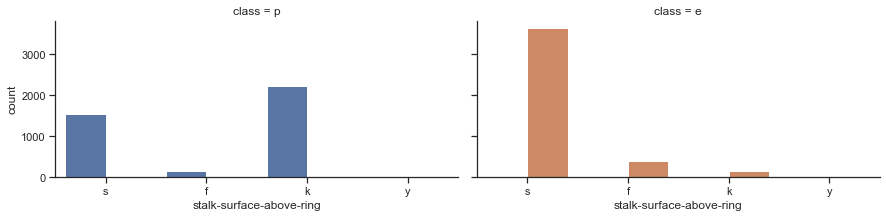

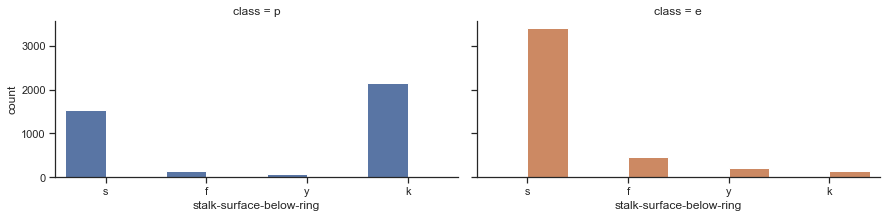

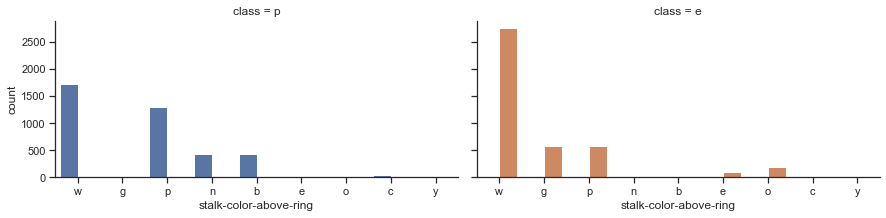

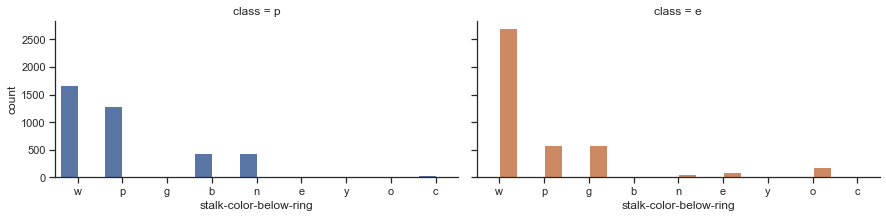

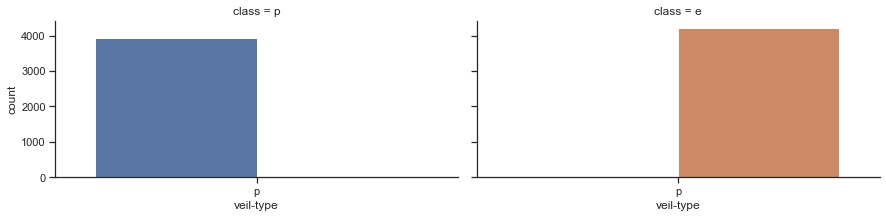

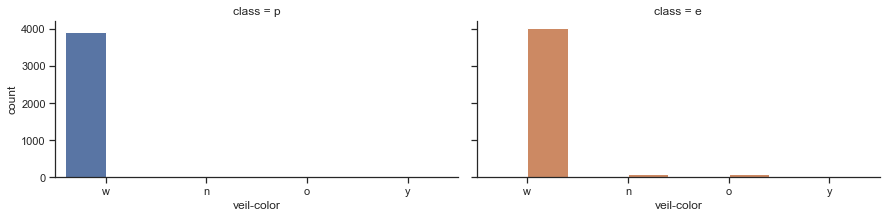

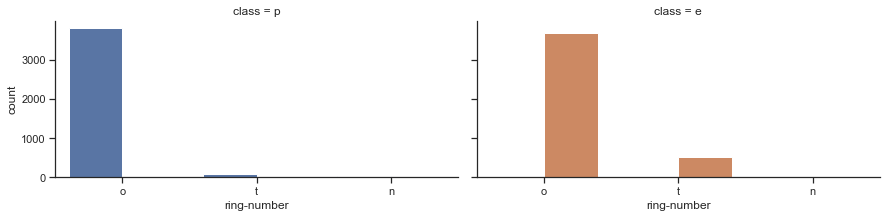

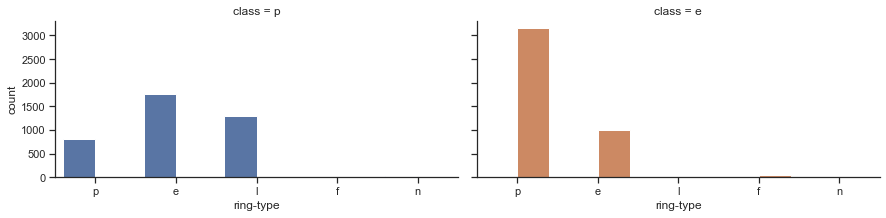

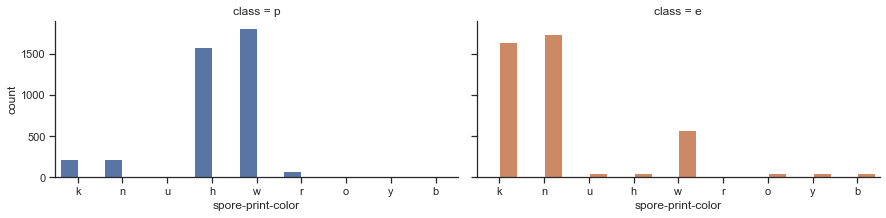

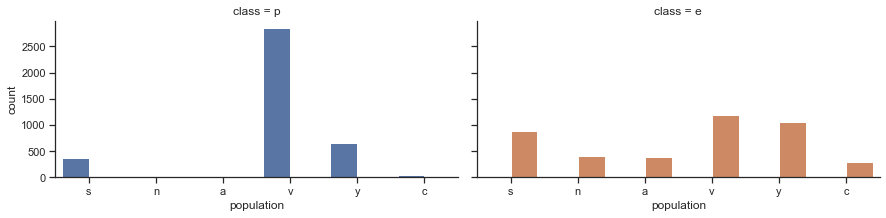

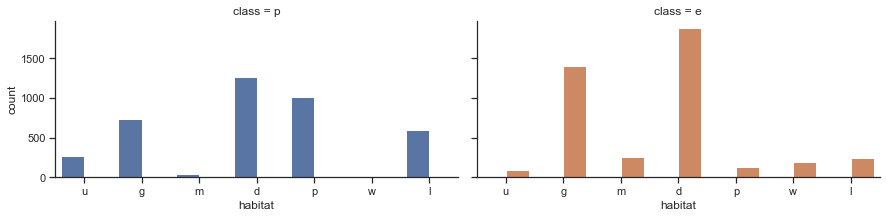

In [6]:
##########Data Visualization#########
sns.set_theme(style="ticks", color_codes=True)
for i in (col[1:]):
     sns.catplot(x=i, hue="class",col="class",col_wrap=4,data=mushroom_data,kind="count",height=3, aspect=2)
    

In [7]:
#########Further analysis of data using visualization output########
print(mushroom_data['veil-color'].value_counts())#
print(mushroom_data["gill-attachment"].value_counts())
print(mushroom_data["ring-number"].value_counts())
print(mushroom_data["stalk-root"].value_counts())#(2480/8124)*100=30.52% data missing

w    7924
n      96
o      96
y       8
Name: veil-color, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
o    7488
t     600
n      36
Name: ring-number, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


In [8]:
######Analysis from graph#############

#veil-color-has aroung 97% of data in w cat which is almost equally distributed in e and p
#gill-attachment- 97% of data in f cat which is equally distributed in e and p
#ring-number-92% data in o cat which is equally distributed in e and p
#stalk root has(2480/8124)*100=30.52% data missing, hece can be dropped

##########removing columns after analysis################
mushroom_target=mushroom_data["class"].apply(lambda x : 1 if x == "p" else 0)#
mushroom_data=mushroom_data.drop(["veil-type","veil-color","ring-number","gill-attachment"],axis=1)

columns=np.array(mushroom_data.columns)
col=np.array(col).reshape((-1,1))#####reshaping into 2D array


In [9]:
mushroom_target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [10]:
mushroom_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,e,s,s,w,w,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,c,s,s,w,w,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,c,s,s,w,w,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,e,s,s,w,w,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,e,s,s,w,w,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,c,b,y,e,?,s,s,o,o,p,b,c,l
8120,e,x,s,n,f,n,c,b,y,e,?,s,s,o,o,p,b,v,l
8121,e,f,s,n,f,n,c,b,n,e,?,s,s,o,o,p,b,c,l
8122,p,k,y,n,f,y,c,n,b,t,?,s,k,w,w,e,w,v,l


In [11]:
mushroom_features=mushroom_data.drop(["class"],axis=1)#drop the target class column
print("The features are -",mushroom_features.columns)

The features are - Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [14]:
#######Data Preprocessing#####
one_hot=OneHotEncoder()
mushroom_coded_value=one_hot.fit_transform(mushroom_features)
mushroom_coded_value=mushroom_coded_value.toarray()#converting sparse matrix to numpy array


columns=columns.reshape((-1,1))
categorical_features=columns
########Giving proper names to columns after encoding#####
onehot_feat_names=OneHotEncoder(handle_unknown='ignore')
mushroom_fullcoded=onehot_feat_names.fit_transform(mushroom_data)
cat_names=onehot_feat_names.get_feature_names(categorical_features)
cat_names=cat_names.flatten()
mushroom_col=pd.DataFrame.sparse.from_spmatrix(mushroom_fullcoded,columns=cat_names)
print(mushroom_col)

      class_e  class_p  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  \
0         0.0      1.0          0.0          0.0          0.0          0.0   
1         1.0      0.0          0.0          0.0          0.0          0.0   
2         1.0      0.0          1.0          0.0          0.0          0.0   
3         0.0      1.0          0.0          0.0          0.0          0.0   
4         1.0      0.0          0.0          0.0          0.0          0.0   
...       ...      ...          ...          ...          ...          ...   
8119      1.0      0.0          0.0          0.0          0.0          1.0   
8120      1.0      0.0          0.0          0.0          0.0          0.0   
8121      1.0      0.0          0.0          0.0          1.0          0.0   
8122      0.0      1.0          0.0          0.0          0.0          1.0   
8123      1.0      0.0          0.0          0.0          0.0          0.0   

      cap-shape_s  cap-shape_x  cap-surface_f  cap-surface_g  .

In [13]:
#######Splitting into train and test data#####
X_train,X_test,y_train,y_test=train_test_split(mushroom_coded_value,mushroom_target,test_size=0.3,random_state=42)

In [325]:
################## Naïve Bayes Classifiers##################

#1.GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf_GNB = GaussianNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_GNB=cross_val_score(clf_GNB,X_train, y_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_GNB)
print('Mean accuracy is',score_GNB.mean())

####predicting output#####
y_pred_GNB = clf_GNB.fit(X_test,y_test)
final_pred_GNB=clf_GNB.predict(X_test)
n_correct=sum(final_pred_GNB==y_test)###finging summ of correct predicted values
print('Final accuracy_score of GaussianNB is',((n_correct/len(final_pred_GNB)*100)))

Accuracy scores of 10 fold validation is [0.9771529  0.98594025 0.98594025 0.98242531 0.96485062 0.97891037
 0.9806338  0.98767606 0.97183099 0.9806338 ]
Mean accuracy is 0.9795994331542859
Final accuracy_score of GaussianNB is 96.26743232157506


Precision =  0.9291338582677166
Recall =  0.9991532599491956
f1_Score = 0.9628722970216238
Area under the ROC curve is 0.9637771073015667
fpr = 0.07159904534606205
tpr = 0.9991532599491956


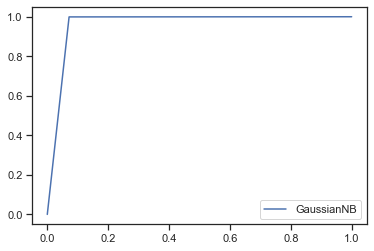

<AxesSubplot:>

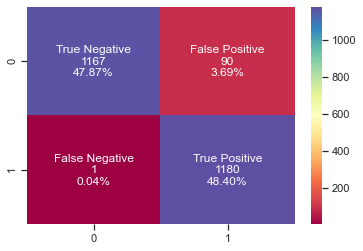

In [326]:
########metrics values#########

precision = precision_score(y_test, final_pred_GNB)
recall = recall_score(y_test, final_pred_GNB)
f1_Score=f1_score(y_test, final_pred_GNB)
ROC_score=roc_auc_score(y_test, final_pred_GNB)
print('Precision = ',precision)
print('Recall = ',recall)
print('f1_Score =',f1_Score)

print('Area under the ROC curve is',ROC_score)
#y_prob=cross_val_predict(clf_GNB,X_train,y_train,cv=3,method="predict_proba")

fpr,tpr,thresholds=metrics.roc_curve(y_test,final_pred_GNB)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="GaussianNB")
#plot_roc_curve(fpr,tpr,label="GaussianNB")
plt.legend(loc="lower right")
plt.show()
#a=metrics.auc(fpr, tpr)
#######Confusion Matrix##########

cnf_GB=confusion_matrix(y_test, final_pred_GNB)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_GB.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_GB.flatten()/np.sum(cnf_GB)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_GB, annot=labels,fmt='',cmap='Spectral')


In [327]:
#MultinomialNB

from sklearn.naive_bayes import MultinomialNB
clf_Multi=MultinomialNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_Multi,X_train, y_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score)
print('Accuracy_mean is'," ",score.mean())
####predicting output#####
y_pred_Multi = clf_Multi.fit(X_test,y_test)
final_pred_multi=clf_Multi.predict(X_test)
n_correct=sum(final_pred_multi==y_test)
print('Final accuracy_score is',((n_correct/len(final_pred_multi)*100)))

Accuracy scores of 10 fold validation is [0.94903339 0.96309315 0.95254833 0.94376098 0.95079086 0.94200351
 0.9471831  0.94190141 0.96478873 0.94014085]
Accuracy_mean is   0.9495244312978043
Final accuracy_score is 93.72436423297785


Precision =  0.9895238095238095
Recall =  0.8797629127857748
f1_Score = 0.931420887494397
Area under the ROC curve is 0.9355059591772948
fpr = 0.008750994431185362
tpr = 0.8797629127857748


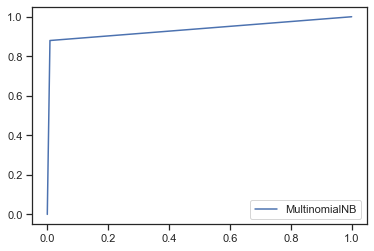

<AxesSubplot:>

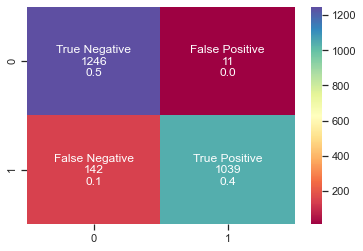

In [328]:
########metrics values#########

precision_multi = precision_score(y_test, final_pred_multi)
recall_multi = recall_score(y_test, final_pred_multi)
f1_Score_multi=f1_score(y_test, final_pred_multi)
ROC_score_multi=roc_auc_score(y_test, final_pred_multi)
print('Precision = ',precision_multi)
print('Recall = ',recall_multi)
print('f1_Score =',f1_Score_multi)
print('Area under the ROC curve is',ROC_score_multi)
fpr,tpr,thresholds=metrics.roc_curve(y_test,final_pred_multi)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="MultinomialNB")
plt.legend(loc="lower right")
plt.show()
#####Confusion Matrix#######
cnf_Multi=confusion_matrix(y_test, final_pred_multi)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Multi.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Multi.flatten()/np.sum(cnf_Multi)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Multi, annot=labels,fmt='',cmap='Spectral')


In [329]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
clf_Brn=BernoulliNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score=cross_val_score(clf_Brn,X_train, y_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score)
print('Accuracy_mean is'," ",score.mean())

####predicting output#####
y_pred_Brn = clf_Brn.fit(X_test,y_test)
final_pred_Brn=clf_Brn.predict(X_test)
n_correct=sum(final_pred_Brn==y_test)
print('Final accuracy_score is',((n_correct/len(final_pred_Brn)*100)))
print(n_correct)

Accuracy scores of 10 fold validation is [0.94024605 0.9543058  0.93497364 0.92970123 0.93321617 0.93497364
 0.92957746 0.93309859 0.94894366 0.93309859]
Accuracy_mean is   0.9372134830070052
Final accuracy_score is 92.65791632485644
2259


Precision =  0.9789674952198852
Recall =  0.8670618120237087
f1_Score = 0.9196228109564436
Area under the ROC curve is 0.9637771073015667
fpr = 0.017501988862370723
tpr = 0.8670618120237087


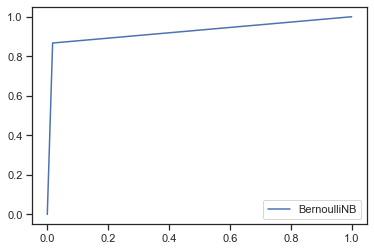

<AxesSubplot:>

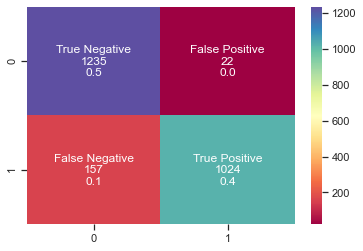

In [330]:
########metrics values#########

precision_Brn = precision_score(y_test, final_pred_Brn)
recall_Brn = recall_score(y_test, final_pred_Brn)
f1_Score_Brn=f1_score(y_test, final_pred_Brn)
ROC_score_Brn=roc_auc_score(y_test, final_pred_Brn)
print('Precision = ',precision_Brn)
print('Recall = ',recall_Brn)
print('f1_Score =',f1_Score_Brn)
print('Area under the ROC curve is',ROC_score)
fpr,tpr,thresholds=metrics.roc_curve(y_test,final_pred_Brn)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="BernoulliNB")
plt.legend(loc="lower right")
plt.show()

#######Confusion Matrix######
cnf_Brn=confusion_matrix(y_test, final_pred_Brn)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Brn.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Brn.flatten()/np.sum(cnf_Brn)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Brn, annot=labels,fmt='',cmap='Spectral')

In [331]:
###Feature selection##
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(mushroom_coded_value,mushroom_target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(mushroom_col.iloc[:,2:].columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs        Score
27                      odor_n  2836.187954
24                      odor_f  2321.062308
55  stalk-surface-above-ring_k  1986.408494
59  stalk-surface-below-ring_k  1914.371389
35                gill-color_b  1856.849847
34                 gill-size_n  1636.606833
86         spore-print-color_h  1560.187561
82                 ring-type_l  1392.637385
84                 ring-type_p  1213.995219
21                   bruises_t  1194.277352


[3.13860644e-03 1.14390725e-04 5.57829986e-04 3.80736540e-04
 7.38839007e-04 1.32361724e-03 4.32127639e-03 1.86927855e-04
 4.16188669e-03 2.46158836e-03 2.64902774e-03 5.46123672e-04
 9.61535542e-05 1.15457615e-03 9.01206996e-04 2.25815399e-03
 2.75603488e-04 1.29638095e-04 2.27363528e-03 4.61586977e-03
 2.70937404e-02 1.49817030e-02 5.00818500e-03 1.03992128e-02
 7.64046856e-02 7.10285987e-03 8.51133718e-04 1.32024507e-01
 8.55270796e-03 3.30429933e-03 1.48690563e-03 2.22063481e-02
 1.81090593e-02 5.37562432e-02 7.94402901e-02 4.42175231e-02
 1.04747598e-04 5.09855945e-04 1.77357850e-03 1.29822675e-04
 1.19571373e-03 5.06277403e-07 6.79868409e-04 1.57651094e-03
 4.11466945e-04 1.61601722e-03 4.30106308e-04 1.16716752e-02
 1.01498347e-02 1.16351342e-02 1.85574361e-02 5.45861030e-03
 1.39425948e-02 1.59517080e-03 6.08600253e-03 4.92205297e-02
 1.98564336e-02 4.92694110e-04 6.93100738e-03 3.54818390e-02
 1.45563095e-02 3.60309053e-03 1.20700068e-03 1.03430048e-03
 8.45617715e-04 1.903869

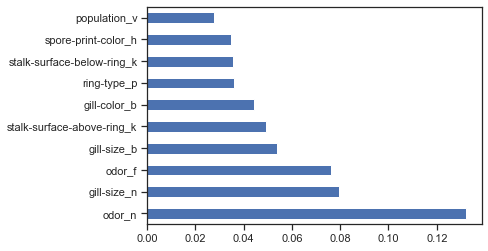

In [332]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(mushroom_coded_value,mushroom_target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=mushroom_col.iloc[:,2:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [333]:
type(feat_importances.nlargest(10))
feat_importances.nlargest(10)



odor_n                        0.132025
gill-size_n                   0.079440
odor_f                        0.076405
gill-size_b                   0.053756
stalk-surface-above-ring_k    0.049221
gill-color_b                  0.044218
ring-type_p                   0.035943
stalk-surface-below-ring_k    0.035482
spore-print-color_h           0.034983
population_v                  0.027566
dtype: float64

In [334]:

#the columns are converted to dataframe from panda.series
top_feat=mushroom_col['odor_n'].to_frame()
topfeatures=['odor_f','gill-size_b','gill-size_n','spore-print-color_h','ring-type_p','stalk-surface-above-ring_k','stalk-surface-above-ring_s','stalk-surface-below-ring_k','gill-color_b',"class_p","class_e"]
for i in topfeatures:
    temp=mushroom_col[i].to_frame()
    top_feat=top_feat.join(temp)
top_feat

,odor_n,odor_f,gill-size_b,gill-size_n,spore-print-color_h,ring-type_p,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,gill-color_b,class_p,class_e
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8120,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8121,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


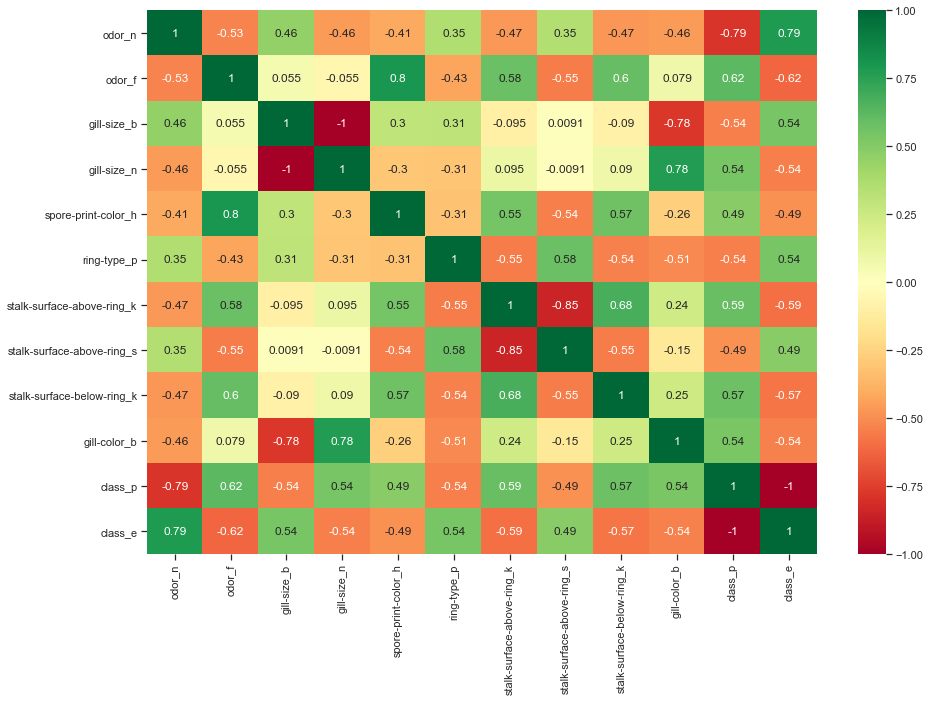

In [335]:
#Correlation of top 10 features with boh classes
corr_matrix=top_feat.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")
plt.savefig('Correlationmatrix.png')

In [336]:
top_feat.iloc[:,0:10]

,odor_n,odor_f,gill-size_b,gill-size_n,spore-print-color_h,ring-type_p,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_k,gill-color_b
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8119,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8120,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8121,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8122,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0


In [337]:
mushroom_target

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

Accuracy scores of 10 fold validation is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean accuracy is 1.0
Final accuracy_score of GaussianNB is 100.0
Precision =  1.0
Recall=  1.0
f1_Score = 1.0
Area under the ROC curve is 1.0
fpr = 0.0
tpr = 1.0


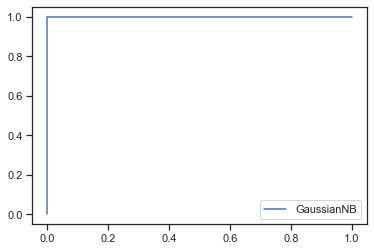

<AxesSubplot:>

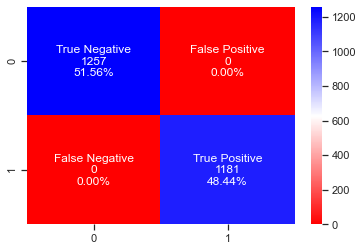

In [338]:
#Naive bayes on top 10 feat#  

X10_train,X10_test,y10_train,y10_test=train_test_split(top_feat.to_numpy(),mushroom_target,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf_GNB_10 = GaussianNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_GNB10=cross_val_score(clf_GNB_10,X10_train, y10_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_GNB10)
print('Mean accuracy is',score_GNB10.mean())

####predicting output#####
y_pred_GNB = clf_GNB_10.fit(X10_test,y10_test)
final_pred_GNB10=clf_GNB_10.predict(X10_test)
n_correct=sum(final_pred_GNB10==y10_test)###finging summ of correct predicted values
print('Final accuracy_score of GaussianNB is',((n_correct/len(final_pred_GNB)*100)))

precision_GNB10 = precision_score(y10_test, final_pred_GNB10)
recall_GNB10 = recall_score(y10_test, final_pred_GNB10)
f1_Score_GNB10=f1_score(y10_test, final_pred_GNB10)
ROC_score_GNB10=roc_auc_score(y10_test, final_pred_GNB10)
print('Precision = ',precision_GNB10)
print('Recall= ',recall_GNB10)
print('f1_Score =',f1_Score_GNB10)
print('Area under the ROC curve is',ROC_score_GNB10)
fpr,tpr,thresholds=metrics.roc_curve(y10_test,final_pred_GNB10)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="GaussianNB")
plt.legend(loc="lower right")
plt.show()


#######Confusion Matrix##########

cnf_GB10=confusion_matrix(y10_test, final_pred_GNB10)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_GB10.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_GB10.flatten()/np.sum(cnf_GB10)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_GB10, annot=labels,fmt='',cmap='bwr_r')


Accuracy scores of 10 fold validation is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy_mean is   1.0
Final accuracy_score is 100.0
Precision =  1.0
Recall =  1.0
f1_Score = 1.0
Area under the ROC curve is 1.0
fpr = 0.0
tpr = 1.0


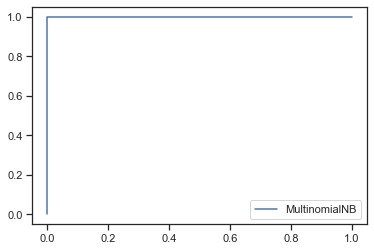

<AxesSubplot:>

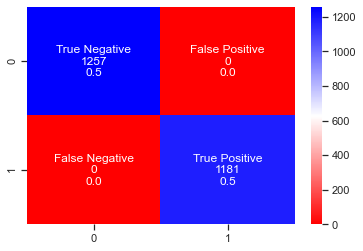

In [339]:
#MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf_Multi10=MultinomialNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_multi10=cross_val_score(clf_Multi10,X10_train, y10_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_multi10)
print('Accuracy_mean is'," ",score_multi10.mean())
####predicting output#####
y_pred_Multi = clf_Multi10.fit(X10_test,y10_test)
final_pred_multi10=clf_Multi10.predict(X10_test)
n_correct=sum(final_pred_multi10==y10_test)
print('Final accuracy_score is',((n_correct/len(final_pred_multi10)*100)))


precision_multi10 = precision_score(y10_test, final_pred_multi10)
recall_multi10 = recall_score(y10_test, final_pred_multi10)
f1_Score_multi10=f1_score(y10_test, final_pred_multi10)
ROC_score_multi10=roc_auc_score(y10_test, final_pred_multi10)
print('Precision = ',precision_multi10)
print('Recall = ',recall_multi10)
print('f1_Score =',f1_Score_multi10)
print('Area under the ROC curve is',ROC_score_multi10)
fpr,tpr,thresholds=metrics.roc_curve(y10_test,final_pred_multi10)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="MultinomialNB")
plt.legend(loc="lower right")
plt.show()


#####Confusion Matrix#######
cnf_Multi10=confusion_matrix(y10_test, final_pred_multi10)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Multi10.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Multi10.flatten()/np.sum(cnf_Multi10)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Multi10, annot=labels,fmt='',cmap='bwr_r')

Accuracy scores of 10 fold validation is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy_mean is   1.0
Final accuracy_score_Brn10 is 100.0
2438
Precision =  1.0
Recall  =  1.0
f1_score = 1.0
Area under the ROC curve is 1.0
fpr = 0.0
tpr = 1.0


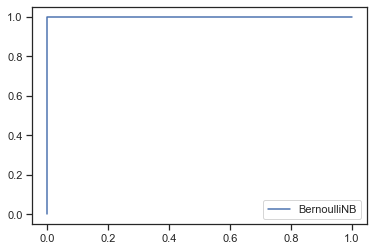

<AxesSubplot:>

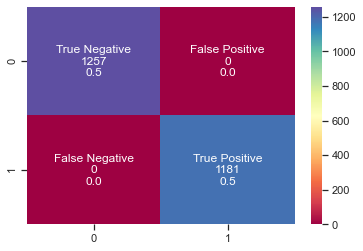

In [340]:
#BernoulliNB10
from sklearn.naive_bayes import BernoulliNB
clf_Brn10=BernoulliNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_Brn10=cross_val_score(clf_Brn10,X10_train, y10_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_Brn10)
print('Accuracy_mean is'," ",score_Brn10.mean())

####predicting output#####
y_pred_Brn = clf_Brn10.fit(X10_test,y10_test)
final_pred_Brn10=clf_Brn10.predict(X10_test)
n_correct=sum(final_pred_Brn10==y10_test)
print('Final accuracy_score_Brn10 is',((n_correct/len(final_pred_Brn10)*100)))
print(n_correct)

precision_Brn10 = precision_score(y10_test, final_pred_Brn10)
recall_Brn10 = recall_score(y10_test, final_pred_Brn10)
f1_score_Brn10=f1_score(y10_test, final_pred_Brn10)
ROC_score_Brn10=roc_auc_score(y10_test, final_pred_Brn10)
print('Precision = ',precision_Brn10)
print('Recall  = ',recall_Brn10)
print('f1_score =',f1_score_Brn10)
print('Area under the ROC curve is',ROC_score_Brn10)
fpr,tpr,thresholds=metrics.roc_curve(y10_test,final_pred_Brn10)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="BernoulliNB")
plt.legend(loc="lower right")
plt.show()

#######Confusion Matrix######
cnf_Brn10=confusion_matrix(y10_test, final_pred_Brn10)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Brn10.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Brn10.flatten()/np.sum(cnf_Brn10)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Brn10, annot=labels,fmt='',cmap='Spectral')

In [341]:
###########top5###############
top_feat_5=top_feat.iloc[:,0:5].to_numpy()
top_feat_5

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.]])

Accuracy scores of 10 fold validation is [0.96309315 0.97539543 0.9543058  0.97012302 0.94727592 0.96660808
 0.96830986 0.96302817 0.95950704 0.96830986]
Mean accuracy is 0.9635956335552862
Final accuracy_score of GaussianNB is 77.48154224774404
Precision =  0.9831804281345565
Recall =  0.5444538526672311
f1_Score = 0.700817438692098
Area under the ROC curve is 0.7678514291180228
fpr = 0.008750994431185362
tpr = 0.5444538526672311


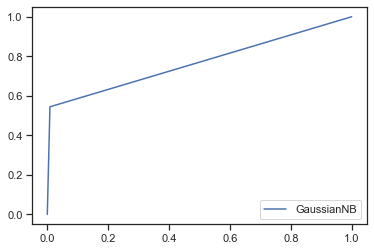

1889


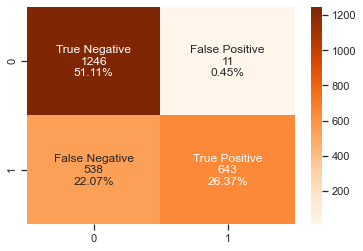

In [342]:
#Naive bayes on top 10 feat#  

X5_train,X5_test,y5_train,y5_test=train_test_split(top_feat_5,mushroom_target,test_size=0.3,random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf_GNB_5 = GaussianNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_GNB5=cross_val_score(clf_GNB_5,X5_train, y5_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_GNB5)
print('Mean accuracy is',score_GNB5.mean())

####predicting output#####
y_pred_GNB = clf_GNB_5.fit(X5_test,y5_test)
final_pred_GNB5=clf_GNB_5.predict(X5_test)
n_correct=sum(final_pred_GNB5==y5_test)###finging summ of correct predicted values
print('Final accuracy_score of GaussianNB is',((n_correct/len(final_pred_GNB5)*100)))

precision_GNB5 = precision_score(y5_test, final_pred_GNB5)
recall_GNB5 = recall_score(y5_test, final_pred_GNB5)
f1_score_GNB5=f1_score(y5_test, final_pred_GNB5)
ROC_score_GNB5=roc_auc_score(y5_test, final_pred_GNB5)
print('Precision = ',precision_GNB5)
print('Recall = ',recall_GNB5)
print('f1_Score =',f1_score_GNB5)
print('Area under the ROC curve is',ROC_score_GNB5)
fpr,tpr,thresholds=metrics.roc_curve(y5_test,final_pred_GNB5)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="GaussianNB")
plt.legend(loc="lower right")
plt.show()

#######Confusion Matrix##########

cnf_GB5=confusion_matrix(y5_test, final_pred_GNB5)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_GB5.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_GB5.flatten()/np.sum(cnf_GB5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_GB5, annot=labels,fmt='',cmap='Oranges')
print(n_correct)

Accuracy scores of 10 fold validation is [0.96309315 0.97539543 0.9543058  0.97012302 0.94727592 0.96660808
 0.96830986 0.96302817 0.95950704 0.96830986]
Accuracy_mean is   0.9635956335552862
Final accuracy_score is 96.18539786710419
Precision =  0.9602368866328257
Recall =  0.9610499576629975
f1_Score = 0.9606432501057977
Area under the ROC curve is 0.9618296725466936
fpr = 0.03739061256961018
tpr = 0.9610499576629975


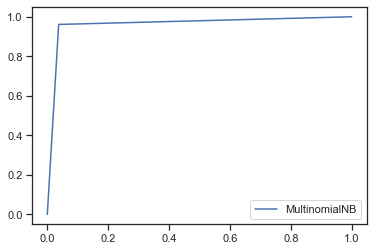

2345


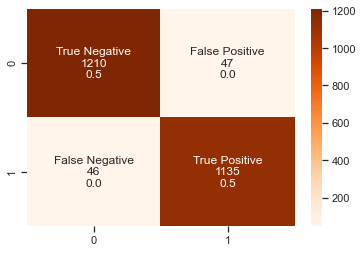

In [343]:
#MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
clf_Multi5=MultinomialNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_multi5=cross_val_score(clf_Multi5,X5_train, y5_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_multi5)
print('Accuracy_mean is'," ",score_multi5.mean())
####predicting output#####
y_pred_Multi = clf_Multi5.fit(X5_test,y5_test)
final_pred_multi5=clf_Multi5.predict(X5_test)
n_correct=sum(final_pred_multi5==y5_test)
print('Final accuracy_score is',((n_correct/len(final_pred_multi5)*100)))

precision_multi5 = precision_score(y5_test, final_pred_multi5)
recall_multi5 = recall_score(y5_test, final_pred_multi5)
f1_Score_multi5=f1_score(y5_test, final_pred_multi5)
ROC_score_multi5=roc_auc_score(y5_test, final_pred_multi5)
print('Precision = ',precision_multi5)
print('Recall = ',recall_multi5)
print('f1_Score =',f1_Score_multi5)
print('Area under the ROC curve is',ROC_score_multi5)
fpr,tpr,thresholds=metrics.roc_curve(y5_test,final_pred_multi5)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="MultinomialNB")
plt.legend(loc="lower right")
plt.show()



#####Confusion Matrix#######
cnf_Multi5=confusion_matrix(y5_test, final_pred_multi5)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Multi5.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Multi5.flatten()/np.sum(cnf_Multi5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Multi5, annot=labels,fmt='',cmap='Oranges')

print(n_correct)

Accuracy scores of 10 fold validation is [0.96309315 0.97539543 0.9543058  0.97012302 0.94727592 0.96660808
 0.96830986 0.96302817 0.95950704 0.96830986]
Accuracy_mean is   0.9635956335552862
Final accuracy_score is 96.18539786710419
2345
Precision =  0.9602368866328257
Recall =  0.9610499576629975
f1_score = 0.9606432501057977
Area under the ROC curve is 0.9618296725466936
fpr = 0.03739061256961018
tpr = 0.9610499576629975


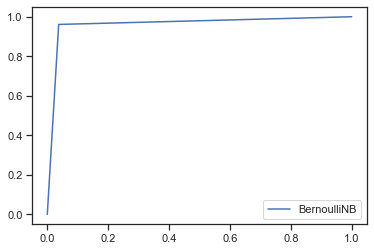

<AxesSubplot:>

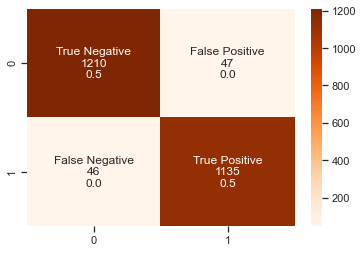

In [344]:
#BernoulliNB5
clf_Brn5=BernoulliNB()

######Performing 10 fold cross validation######

score_Brn5=cross_val_score(clf_Brn5,X5_train, y5_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_Brn5)
print('Accuracy_mean is'," ",score_Brn5.mean())

####predicting output#####
clf_Brn5.fit(X5_test,y5_test)
final_pred_Brn5=clf_Brn5.predict(X5_test)
n_correct=sum(final_pred_Brn5==y5_test)
print('Final accuracy_score is',((n_correct/len(final_pred_Brn5)*100)))
print(n_correct)

precision_Brn5 = precision_score(y5_test, final_pred_Brn5)
recall_Brn5 = recall_score(y5_test, final_pred_Brn5)
f1_score_Brn5=f1_score(y5_test, final_pred_Brn5)
ROC_score_Brn5=roc_auc_score(y5_test, final_pred_Brn5)
print('Precision = ',precision_Brn5)
print('Recall = ',recall_Brn5)
print('f1_score =',f1_score_Brn5)
print('Area under the ROC curve is',ROC_score_Brn5)
fpr,tpr,thresholds=metrics.roc_curve(y5_test,final_pred_Brn5)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="BernoulliNB")
plt.legend(loc="lower right")
plt.show()

#######Confusion Matrix######
cnf_Brn5=confusion_matrix(y5_test, final_pred_Brn5)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Brn5.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Brn5.flatten()/np.sum(cnf_Brn5)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Brn5, annot=labels,fmt='',cmap='Oranges')

In [345]:
top_feat_2=top_feat.iloc[:,0:2].to_numpy()
######################Naive bayes top2###############
X2_train,X2_test,y2_train,y2_test=train_test_split(top_feat_2,mushroom_target,test_size=0.3,random_state=42)


Accuracy scores of 10 fold validation is [0.80667838 0.78910369 0.79086116 0.78207381 0.77855888 0.75922671
 0.79577465 0.77464789 0.78873239 0.79225352]
Mean accuracy is 0.7857911086908091
Final accuracy_score of GaussianNB is 100.0
Precision =  1.0
Recall =  0.5444538526672311
f1_Score = 0.7050438596491228
Area under the ROC curve is 0.7722269263336156
fpr = 0.0
tpr = 0.5444538526672311


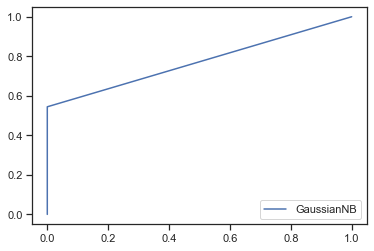

2438


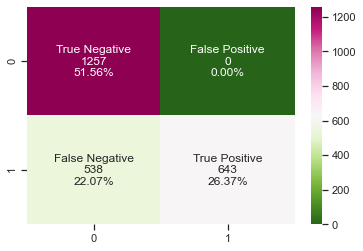

In [346]:
clf_GNB2=GaussianNB()
score_GNB2=cross_val_score(clf_GNB2,X2_train, y2_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_GNB2)
print('Mean accuracy is',score_GNB2.mean())

###predicting output#####
y_pred_GNB2 = clf_GNB2.fit(X2_test,y2_test)
final_pred_GNB2=clf_GNB2.predict(X2_test)
n_correct=sum(final_pred_GNB10==y2_test)###finging summ of correct predicted values
print('Final accuracy_score of GaussianNB is',((n_correct/len(final_pred_GNB2)*100)))


precision_GNB2 = precision_score(y2_test, final_pred_GNB2)
recall_GNB2 = recall_score(y2_test, final_pred_GNB2)
f1_score_GNB2=f1_score(y2_test, final_pred_GNB2)
ROC_score_GNB2=roc_auc_score(y2_test, final_pred_GNB2)
print('Precision = ',precision_GNB2)
print('Recall = ',recall_GNB2)
print('f1_Score =',f1_score_GNB2)
print('Area under the ROC curve is',ROC_score_GNB2)
fpr,tpr,thresholds=metrics.roc_curve(y2_test,final_pred_GNB2)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="GaussianNB")
plt.legend(loc="lower right")
plt.show()

#######Confusion Matrix##########

cnf_GB2=confusion_matrix(y2_test, final_pred_GNB2)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_GB2.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cnf_GB2.flatten()/np.sum(cnf_GB2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_GB2, annot=labels,fmt='',cmap='PiYG_r')
print(n_correct)


Accuracy scores of 10 fold validation is [0.80667838 0.78910369 0.79086116 0.78207381 0.77855888 0.75922671
 0.79577465 0.77464789 0.78873239 0.79225352]
Accuracy_mean is   0.7857911086908091
Precision =  1.0
Recall  =  0.5444538526672311
f1_Score = 0.7050438596491228
Area under the ROC curve is 0.7722269263336156
Final accuracy_score is 77.93273174733389
fpr = 0.0
tpr = 0.5444538526672311


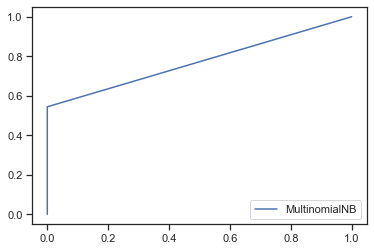

1900


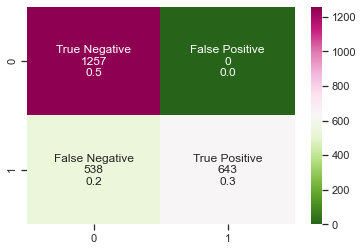

In [347]:
#MultinomialNB
clf_Multi2=MultinomialNB()

######Performing 10 fold cross validation######
from sklearn.model_selection import cross_val_score
score_multi2=cross_val_score(clf_Multi2,X2_train, y2_train,scoring='accuracy',cv=10)
y_pred_multi2 = clf_Multi2.fit(X2_test,y2_test)
print('Accuracy scores of 10 fold validation is',score_multi2)
print('Accuracy_mean is'," ",score_multi2.mean())
final_pred_multi2=clf_Multi2.predict(X2_test)
n_correct=sum(final_pred_multi2==y2_test)
####predicting output#####
clf_Multi2.fit(X2_test,y2_test)
precision_multi2 = precision_score(y2_test, final_pred_multi2)
recall_multi2 = recall_score(y2_test, final_pred_multi2)
f1_Score_multi2=f1_score(y2_test, final_pred_multi2)
ROC_score_multi2=roc_auc_score(y2_test, final_pred_multi2)
print('Precision = ',precision_multi2)
print('Recall  = ',recall_multi2)
print('f1_Score =',f1_Score_multi2)
print('Area under the ROC curve is',ROC_score_multi2)
print('Final accuracy_score is',((n_correct/len(final_pred_multi2)*100)))
fpr,tpr,thresholds=metrics.roc_curve(y2_test,final_pred_multi2)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="MultinomialNB")
plt.legend(loc="lower right")
plt.show()
#####Confusion Matrix#######
cnf_Multi2=confusion_matrix(y2_test, final_pred_multi2)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Multi2.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Multi2.flatten()/np.sum(cnf_Multi2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Multi2, annot=labels,fmt='',cmap='PiYG_r')

print(n_correct)

Accuracy scores of 10 fold validation is [0.89455185 0.89103691 0.88224956 0.89630931 0.88400703 0.89455185
 0.87852113 0.8943662  0.90316901 0.8943662 ]
Accuracy_mean is   0.891312903784747
Final accuracy_score is 87.61279737489745
2136
Precision =  0.8128113879003559
Recall =  0.9669771380186283
f1_score = 0.8832173240525909
Area under the ROC curve is 0.8788744083092346
fpr = 0.2092283214001591
tpr = 0.9669771380186283


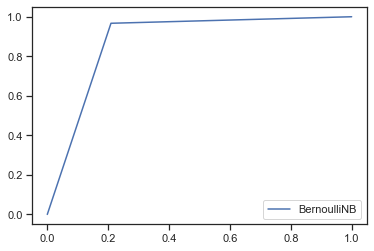

<AxesSubplot:>

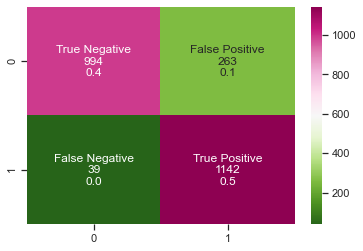

In [348]:
#BernoulliNB5
clf_Brn2=BernoulliNB()

######Performing 10 fold cross validation######
score_Brn2=cross_val_score(clf_Brn2,X2_train, y2_train,scoring='accuracy',cv=10)
print('Accuracy scores of 10 fold validation is',score_Brn2)
print('Accuracy_mean is'," ",score_Brn2.mean())

####predicting output#####
clf_Brn2.fit(X2_test,y2_test)
final_pred_Brn2=clf_Brn2.predict(X2_test)
n_correct=sum(final_pred_Brn2==y2_test)
print('Final accuracy_score is',((n_correct/len(final_pred_Brn2)*100)))
print(n_correct)

precision_Brn2 = precision_score(y2_test, final_pred_Brn2)
recall_Brn2 = recall_score(y2_test, final_pred_Brn2)
f1_score_Brn2=f1_score(y2_test, final_pred_Brn2)
ROC_score_Brn2=roc_auc_score(y2_test, final_pred_Brn2)
print('Precision = ',precision_Brn2)
print('Recall = ',recall_Brn2)
print('f1_score =',f1_score_Brn2)
print('Area under the ROC curve is',ROC_score_Brn2)
fpr,tpr,thresholds=metrics.roc_curve(y2_test,final_pred_Brn2)
print("fpr =",fpr[1])
print("tpr =",tpr[1])
plt.plot(fpr,tpr,label="BernoulliNB")
plt.legend(loc="lower right")
plt.show()
#####Confus
#######Confusion Matrix######
cnf_Brn2=confusion_matrix(y2_test, final_pred_Brn2)
group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in cnf_Brn2.flatten()]
group_percentages = ['{0:.1f}'.format(value) for value in cnf_Brn2.flatten()/np.sum(cnf_Brn2)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_Brn2, annot=labels,fmt='',cmap='PiYG_r')

# CLUSTERING